<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Longest_Increasing_Subsequence_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Longest Increasing Subsequence

Given a non-empty array of integers, write a function that returns the longest strictly-increasing subsequence in the array.

A subsequence of an array is a set of numbers that aren't necessarily adjacent in the array but that are in the same order as they appear in the array. For instance, the numbers `[1, 3, 4]` form a subsequence of the array `[1, 2, 3, 4]`, and so do the numbers `[2, 4]`. Note that a single number in an array and the array itself are both valid subsequences of the array.

You can assume that there will only be one longest increasing subsequence.

Sample Input

```
array = [5, 7, -24, 12, 10, 2, 3, 12, 5, 6, 35]
```



Sample Output

```
[-24, 2, 3, 5, 6, 35]
```



## Solution 1

In [1]:
# Time O(n^2)
# Space O(n)

def longestIncreasingSubsequence(array):
  lenghts = [1 for _ in range(len(array))]
  previous_idx = [None for _ in range(len(array))]
  max_lenght_idx = 0

  for row in range(len(array)):
    for col in range(row):
      if array[row] > array[col] and lenghts[col] + 1 > lenghts[row]:
        lenghts[row] = lenghts[col] + 1
        previous_idx[row] = col
    if lenghts[row] > lenghts[max_lenght_idx]:
      max_lenght_idx = row

  return get_subsequence(array, previous_idx, max_lenght_idx)

def get_subsequence(array, previous_idx, current_idx):
  subsequence = []
  while current_idx != None:
    subsequence.append(array[current_idx])
    current_idx = previous_idx[current_idx]
  return list(reversed(subsequence))

In [2]:
array = [5, 7, -24, 12, 10, 2, 3, 12, 5, 6, 35]
print(longestIncreasingSubsequence(array))

[-24, 2, 3, 5, 6, 35]


In [3]:
array = [3, 4, -1]
print(longestIncreasingSubsequence(array))

[3, 4]


### Conceptual Note

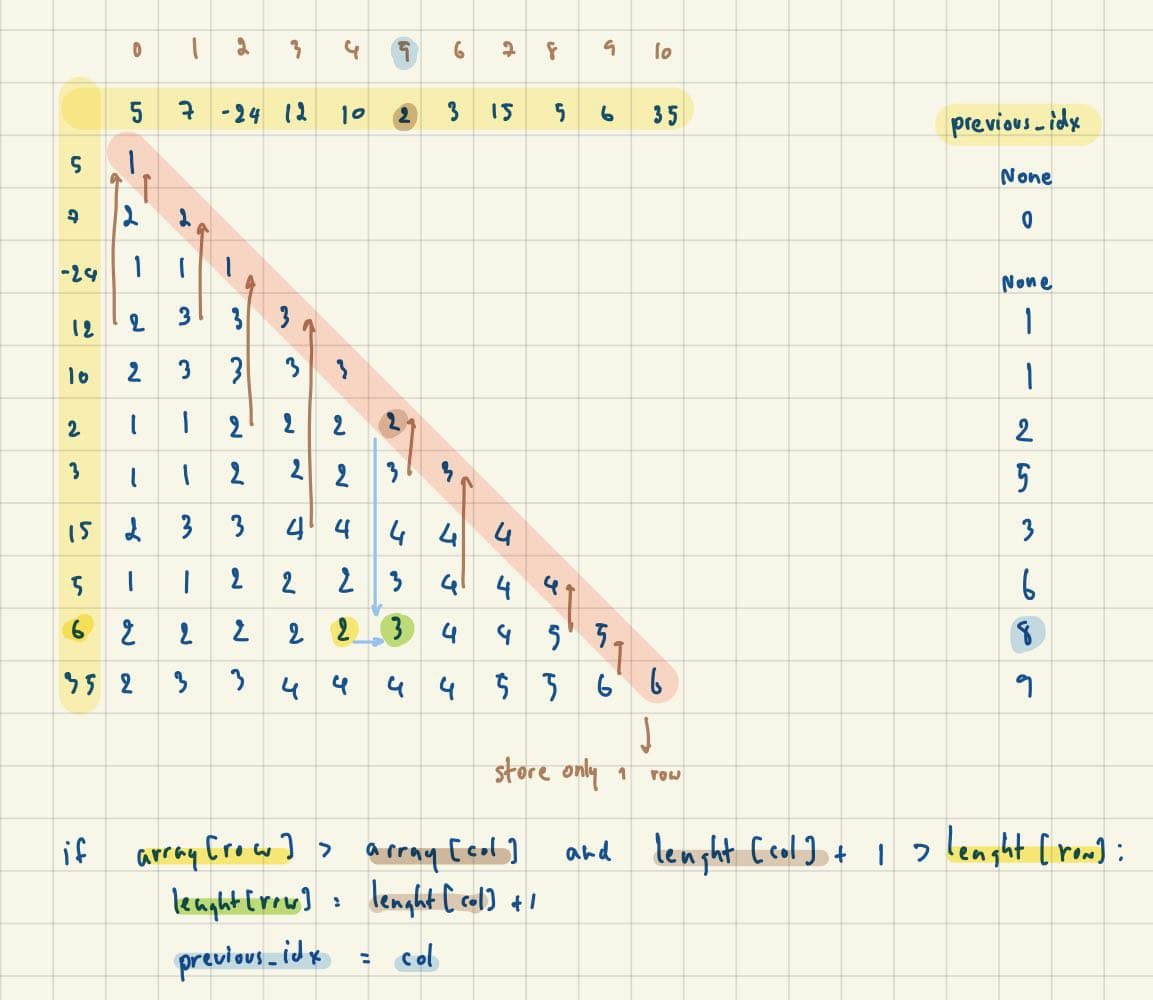

## Solution 2

In [13]:
def longestIncreasingSubsequence(array):
  previous_idx = [None for _ in range(len(array))]
  smallest_value_idx = [None for _ in range(len(array) + 1)]
  max_lenght = 0

  for i in range(len(array)):
    new_lenght = binary_search(array[i], smallest_value_idx, array, left_idx = 1, right_idx = max_lenght)
    previous_idx[i] = smallest_value_idx[new_lenght - 1]
    smallest_value_idx[new_lenght] = i
    max_lenght = max(max_lenght, new_lenght)
    
  return get_subsequence(array, previous_idx, smallest_value_idx[max_lenght])

def binary_search(num, idx, array, left_idx, right_idx):
  
  while left_idx <= right_idx:
    mid_idx = (left_idx + right_idx) // 2

    if num > array[idx[mid_idx]]:
      left_idx = mid_idx + 1
    else:
      right_idx = mid_idx - 1
  
  return left_idx

def get_subsequence(array, previous_idx, current_idx):
  subsequence = []
  while current_idx != None:
    subsequence.append(array[current_idx])
    current_idx = previous_idx[current_idx]
  return list(reversed(subsequence))

In [14]:
array = [5, 7, -24, 12, 10, 2, 3, 12, 5, 6, 35]
print(longestIncreasingSubsequence(array))

[-24, 2, 3, 5, 6, 35]


### Conceptual Note

- Iterate through array
- Apply binary search to insert index in smallest idx
- smallest idx represent smallest value in the particular lenght

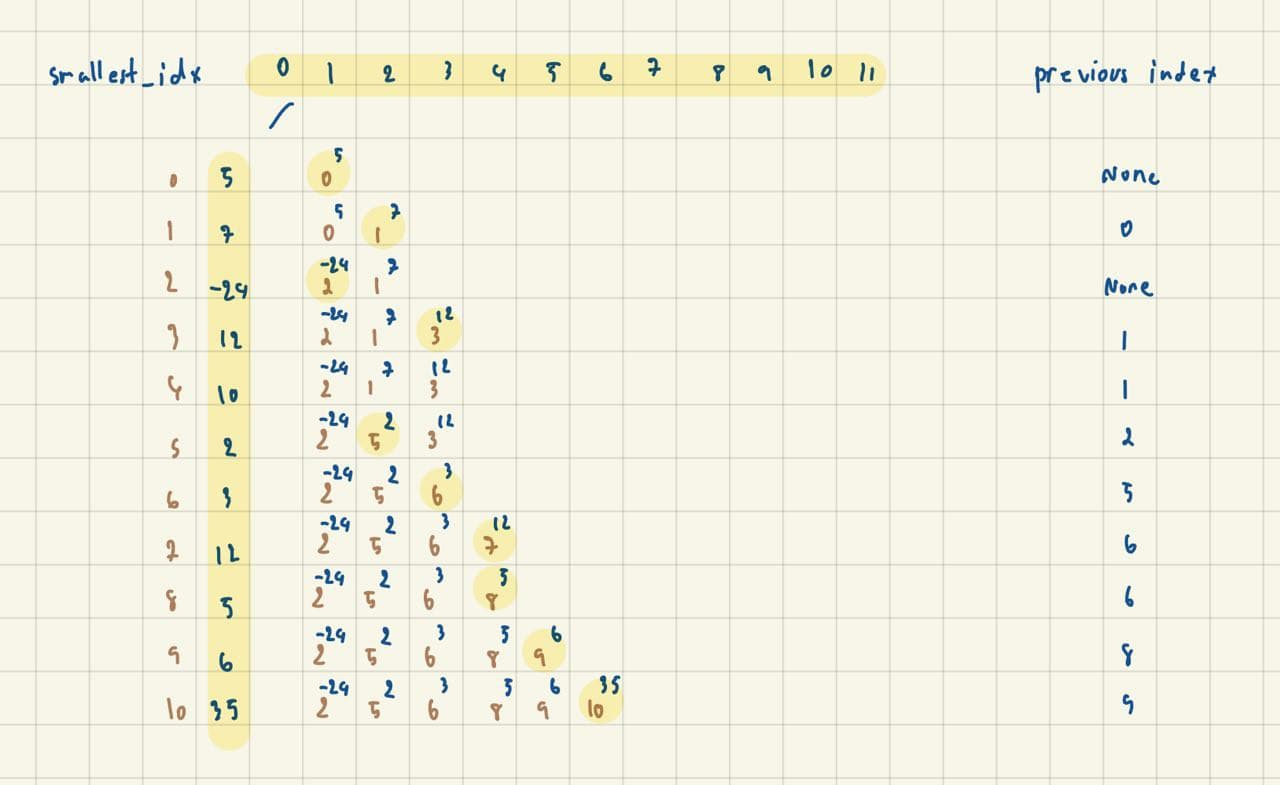